In [1125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

Celem jest predykcja ceny nieruchomości.

Zbiór danych zawiera 4802 instancje i kolumny określające:

BROKERTITLE: Title of the broker
TYPE: Type of the house
PRICE: Price of the house
BEDS: Number of bedrooms
BATH: Number of bathrooms
PROPERTYSQFT: Square footage of the property
ADDRESS: Full address of the house
STATE: State of the house
MAIN_ADDRESS: Main address information
ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
LOCALITY: Locality information
SUBLOCALITY: Sublocality information
STREET_NAME: Street name
LONG_NAME: Long name
FORMATTED_ADDRESS: Formatted address
LATITUDE: Latitude coordinate of the house
LONGITUDE: Longitude coordinate of the house

In [1126]:
import pandas as pd
url = 'NY-House-Dataset.csv'
data = pd.read_csv(url, sep= ';')

In [1127]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Podział kolumn na dwie kategorie: dane numeryczne i dane kategoryczne. 

In [1128]:
numeric_columns = {'PRICE', 'BEDS','BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'}
category_columns = {'TYPE', 'BROKERTITLE', 'STATE', 'LONG_NAME', 'LOCALITY', 'ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'STREET_NAME'}

Zmienienie liter na małe w celu ujednolicenia danych. 

In [1129]:
for column in category_columns:
    data[column] = data[column].str.lower()

Sprawdzenie unikalnych wartości oraz charakterystyki zbioru danych.

In [1130]:
data[list(category_columns)].nunique()

BROKERTITLE                    1011
STREET_NAME                     174
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
MAIN_ADDRESS                   4583
SUBLOCALITY                      21
FORMATTED_ADDRESS              4550
TYPE                             13
ADDRESS                        4582
STATE                           308
LONG_NAME                      2731
dtype: int64

In [1131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [1132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


In [1133]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,brokered by douglas elliman -111 fifth ave,condo for sale,315000,2,2.000000,1400.0,2 e 55th st unit 803,"new york, ny 10022","2 e 55th st unit 803new york, ny 10022",new york county,new york,manhattan,east 55th street,regis residence,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.974483
1,brokered by serhant,condo for sale,195000000,7,10.000000,17545.0,central park tower penthouse-217 w 57th new yo...,"new york, ny 10019",central park tower penthouse-217 w 57th new yo...,united states,new york,new york county,new york,west 57th street,"217 w 57th st, new york, ny 10019, usa",40.766393,-73.980991
2,brokered by sowae corp,house for sale,260000,4,2.000000,2015.0,620 sinclair ave,"staten island, ny 10312","620 sinclair avestaten island, ny 10312",united states,new york,richmond county,staten island,sinclair avenue,"620 sinclair ave, staten island, ny 10312, usa",40.541805,-74.196109
3,brokered by compass,condo for sale,69000,3,1.000000,445.0,2 e 55th st unit 908w33,"manhattan, ny 10022","2 e 55th st unit 908w33manhattan, ny 10022",united states,new york,new york county,new york,east 55th street,"2 e 55th st, new york, ny 10022, usa",40.761398,-73.974613
4,brokered by sotheby's international realty - e...,townhouse for sale,55000000,7,2.373861,14175.0,5 e 64th st,"new york, ny 10065","5 e 64th stnew york, ny 10065",united states,new york,new york county,new york,east 64th street,"5 e 64th st, new york, ny 10065, usa",40.767224,-73.969856


Sprawdzenie braków danych.

In [1134]:
data.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

Sprawdzenie ilościi zduplikowanych wierszy i ich usunięcie.

In [1135]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  214


Usunięcie w kolumnie „BROKERTITLE” ciągów znaków 'llc', 'inc', zamiana wartości 'rlty' na 'realty' i zapisanie wyników tych zmian w nowej kolumnie „Broker”.

BROKERTITLE

In [1136]:
data['BROKER'] = data['BROKERTITLE'].str.replace('llc','')
data['BROKER'] = data['BROKER'].str.replace('inc','')
data['BROKER'] = data['BROKER'].str.replace('rlty','realty')
data['BROKER'] = data['BROKER'].str.replace('.','')
def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else value
    result = result.strip()
    return result

data['BROKER'] = data['BROKER'].apply(lambda x: split_by_delimeter(x, ' -'))

TYPE

In [1137]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]


,BATH,BEDS
75,2.373861,3
77,2.373861,3
78,2.373861,3
360,2.373861,3
377,2.373861,3
392,2.373861,3
397,2.373861,3
400,2.000000,3
401,2.373861,3
402,2.373861,3


W kolumnie „TYPE” ciąg znaków "condop" zmieniony na "condo". 

Stworzenie nowej kolumny „ANNOUNCEMENT_TYPE” która przypisuje ogłoszeniom odpowiednie kategorie na podstawie ich typu ('TYPE') przy użyciu wcześniej zdefiniowanego słownika. 

Usuwamy również ciąg znaków „for sale” z wartości w kolumnie TYPE.

In [1138]:
#Zamieniamy liczbe łazienek i sypialni na zero dla ogłoszeń, które są dla sprzedaży działki
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]= 0
data["TYPE"] = data["TYPE"].str.replace('condop', 'condo')

data['ANNOUNCEMENT_TYPE'] = data['TYPE'].replace({
                                    'condo for sale': 'apartment',
                                     'townhouse for sale': 'home',
                                     'house for sale': 'home',
                                     'multi-family home for sale': 'home',
                                     'co-op for sale': 'co-op',
                                     'mobile house for sale': 'home',
                                     'land for sale': 'land',
                                     'foreclosure': 'other',
                                     'contingent': 'other',
                                     'pending': 'other',
                                     'coming soon': 'other',
                                    'for sale': 'other'})
data["TYPE"] = data["TYPE"].str.replace(" for sale", "")

PRICE - W kolumnie „PRICE” usuwamy wiersze, dla których cena jest większa niż 100 000 000 lub mniejsza niż 10 000 i zmienienie typ danych na liczby zmiennoprzecinkowe.

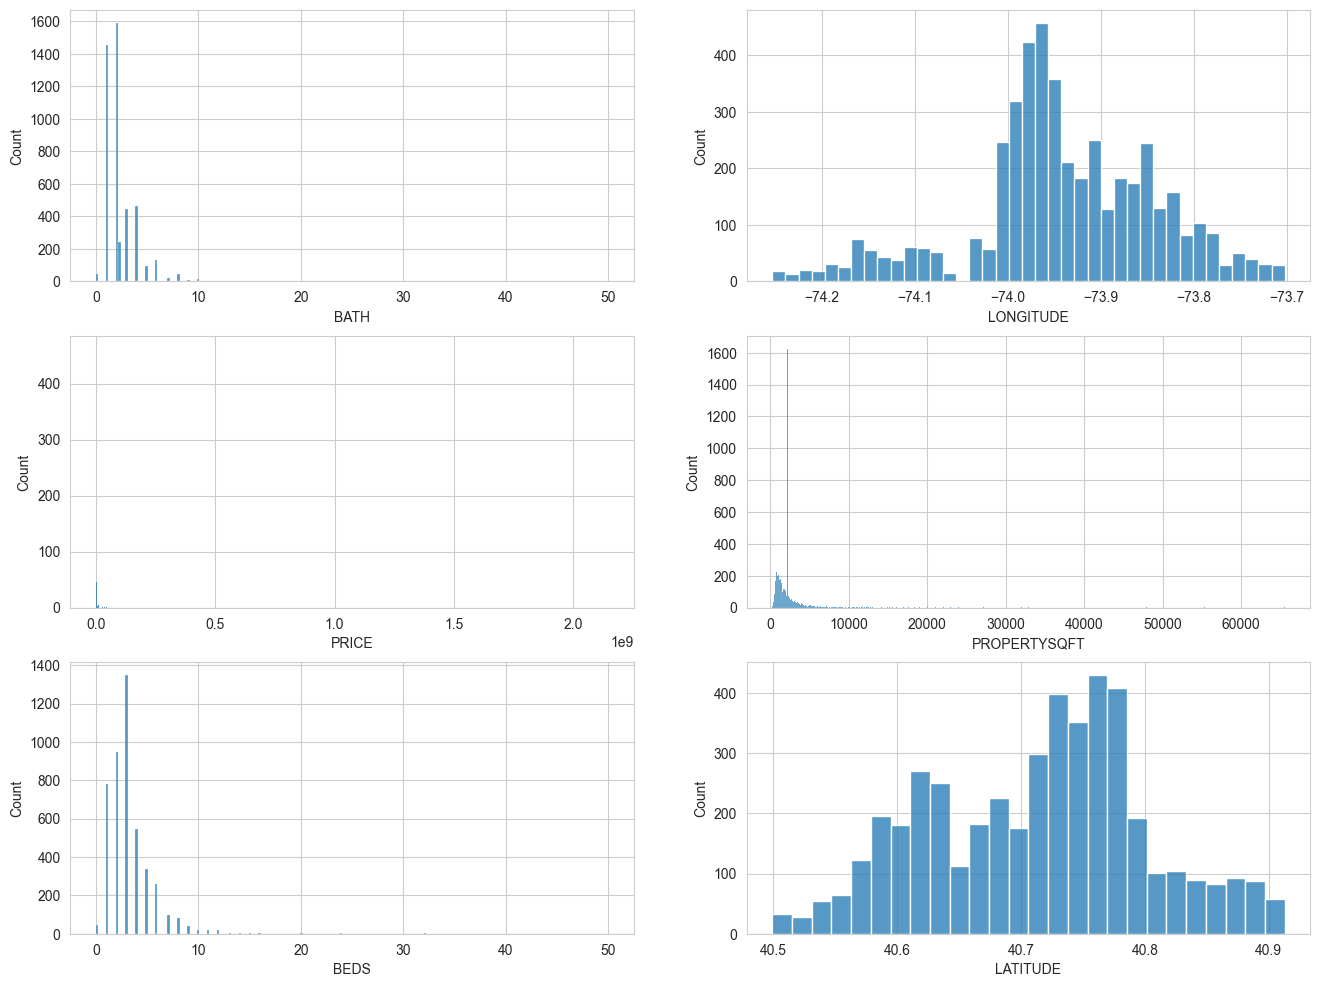

In [1139]:
fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.histplot(x=data[column], ax=axes[i])
    i=i+1

plt.show()

In [1140]:
data.drop(data.loc[(data["PRICE"] > 100000000) | (data["PRICE"]<10000)].index, inplace= True)
data['PRICE'] = data['PRICE'].astype(float)

BATH, BEDS

In [1141]:
data['BATH'].value_counts()

BATH
2.000000     1592
1.000000     1454
4.000000      464
3.000000      447
2.373861      242
6.000000      133
5.000000       95
0.000000       48
8.000000       43
7.000000       23
10.000000      15
9.000000        7
16.000000       5
20.000000       3
12.000000       3
11.000000       2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64

In [1142]:
data['BEDS'].value_counts()

BEDS
3     1349
2      949
1      779
4      544
5      339
6      260
7       98
8       81
0       46
9       38
12      22
10      21
11      20
14       6
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

Utworzenie nowej kolumny „PROPERTYSQFT1000”, w której wartości są obliczane przez podzielenie wartości w kolumnie 'PROPERTYSQFT' przez 1000, zaokrąglając wynik w dół do liczby całkowitej , w celu znalezienia wartości odstających. 

Zostały pozostawione wiersze z wartościami dla których metraż nieruchomości podzielony przez 1000 mieści się w zakresie od 0 do 8.

Pozostawiono wiersze z kolumny „BATH”, w których liczba łazienek mieści się w zakresie od 0 do 10, ze względu na małą ilość wystąpień wartości spoza tego przedziału.

Pozostawiono wiersze z kolumny „BEDS” w których liczba sypialni mieści się w zakresie od 0 do 12, ze względu na małą ilość wystąpień wartości spoza tego przedziału.


In [1143]:
data['PROPERTYSQFT1000'] = data['PROPERTYSQFT'].apply(lambda x: x//1000)
data['PROPERTYSQFT1000'].value_counts()


PROPERTYSQFT1000
2.0     2035
1.0     1157
0.0      817
3.0      258
4.0      111
5.0       75
6.0       41
7.0       22
8.0       18
9.0        9
12.0       8
10.0       6
11.0       4
15.0       3
18.0       2
17.0       2
14.0       1
48.0       1
20.0       1
22.0       1
24.0       1
21.0       1
16.0       1
55.0       1
13.0       1
33.0       1
27.0       1
23.0       1
32.0       1
65.0       1
Name: count, dtype: int64

In [1144]:
data = data[(data['BATH'] >= 0) & (data['BATH'] <= 10)]
data = data[(data['BEDS'] >= 0) & (data['BEDS'] <= 12)]
data['BATH'] = data['BATH'].apply(lambda x: x if float.is_integer(x) else int(x))
data = data[(data['PROPERTYSQFT1000'] >= 0) & (data['PROPERTYSQFT1000'] <= 8)]

data['PROPERTYSQFT'] = data['PROPERTYSQFT'].round(2)

Cleaning adresses

In [1145]:
data_api = data.copy()

Usunięcie kolumny „MAIN ADDRESS”, ponieważ jest połączeniem kolumn „ADRESS” i „STATE”.


In [1146]:
(data["ADDRESS"] + data["STATE"] == data["MAIN_ADDRESS"]).unique()
data.drop("MAIN_ADDRESS", axis=1, inplace=True)

Utworzenie słownika „dictLocality”, który mapuje nazwy hrabstw na nazwy dzielnic w Nowym Jorku. 

Stworzenie listy „listOfBoroughs” zawierającej nazwy dzielnic (wartości powyżej wspomnianego słownika).

In [1147]:
dictLocality = {"new york county": "manhattan",  "kings county":"brooklyn","bronx county":"the bronx", "richmond county": "staten island", "queens county":"queens"}
listOfBoroughs = list(dictLocality.values())

Zamieniamy wartości wystepujace jako klucze w słowniku na odpowiadające im wartości we wszystkich kolumnach.

In [1148]:
for c in list(data.columns):
  for i in list(dictLocality.keys()):
    data[c] = data[c].astype(str).str.replace(i, dictLocality[i])

In [1149]:
# Słownik mapujący skrócone i niepoprawne nazwy stanów i dzielnic na ich poprawne nazwy
state_replacements = {
    'nyc': 'new york',
    'ny': 'new york',
    'new yorkc': 'new york',
    'new york city': 'new york',
    r'kew gardens hill(?!s)': 'kew garden hills',
    r'kew gardens(?! hills)': 'kew garden hills',
    'kew gardens hills': 'kew garden hills',
    'kew gardens hillss': 'kew garden hills',
    r'(?<!\bthe\s)bronx new york': 'the bronx',
    'queens village': 'queens',
    r'(?<!\bthe\s)bronx ny': 'the bronx',
    'brooklyn heights': 'brooklyn',
    r'\b(?<!\bthe\s)(?<!\beast\s)(?<!\bwest\s)bronx\b': 'the bronx'
}


for col in ["ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2", "STATE", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME", "FORMATTED_ADDRESS"]:
  for i in list(state_replacements.keys()):
    data[col] = data[col].str.replace(i, state_replacements[i], regex=True)

In [1150]:
print(data["LOCALITY"].unique())
# Przypisanie wartości z kolumny "LOCALITY" do kolumny "BOROUGH", jeśli wartość znajduje się w liście istOfBoroughs.
data.loc[data["LOCALITY"].isin(listOfBoroughs), "BOROUGH"] = data['LOCALITY']
print(data["BOROUGH"].unique())
# Jeżeli wartość w kolumnie LOCALITY to flatbush to przepisujemy tą wartość do kolumny NEIGHBOURHOOD
data.loc[data["LOCALITY"] == "flatbush", "NEIGHBOURHOOD"] = data['LOCALITY']

['new york' 'manhattan' 'the bronx' 'brooklyn' 'queens' 'staten island'
 'united states' 'flatbush']
[nan 'manhattan' 'the bronx' 'brooklyn' 'queens' 'staten island']


In [1151]:
print(data["SUBLOCALITY"].unique())
# Przepisanie wartości z SUBLOCALITY do kolumny BOROUGH, jeśli wartość jest zawarta w listOfBoroughs oraz komórka w kolumnie BOROUGH jest pusta.
data.loc[(data["SUBLOCALITY"].isin(listOfBoroughs)) &(data["BOROUGH"].isna()) , "BOROUGH"] = data["SUBLOCALITY"]

# Jeżeli kolumna SUBLOCALITY zawiera "snyder avenue" to przepisujemy tą wartość do kolumny STREET.
data.loc[data["SUBLOCALITY"] == "snyder avenue" , "STREET"] = data["SUBLOCALITY"]

# Jeśli wartość w kolumnie SUBLOCALITY nie znajduje się w listOfBoroughs, nie jest równa "new york" ani "snyder avenue" to przypisujemy tą wartość do odpowiadającej komórki w kolumnie NEIGHBOURHOOD.
data.loc[(data["SUBLOCALITY"].isin(list(filter(lambda x: x not in listOfBoroughs, list(data["SUBLOCALITY"]))))) & (~(data["SUBLOCALITY"].isin(["new york", "snyder avenue"]))) , "NEIGHBOURHOOD"] = data["SUBLOCALITY"]

['manhattan' 'staten island' 'brooklyn' 'new york' 'east bronx'
 'the bronx' 'queens' 'coney island' 'jackson heights' 'riverdale'
 'rego park' 'fort hamilton' 'flushing' 'dumbo' 'snew yorkder avenue']


In [1152]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,...,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKER,ANNOUNCEMENT_TYPE,PROPERTYSQFT1000,BOROUGH,NEIGHBOURHOOD,STREET
0,brokered by douglas elliman -111 fifth ave,condo,315000.0,2,2.0,1400.0,2 e 55th st unit 803,"new york, new york 10022",manhattan,new york,...,regis residence,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.9744834,brokered by douglas elliman,apartment,1.0,manhattan,NaN,NaN
2,brokered by sowae corp,house,260000.0,4,2.0,2015.0,620 sinclair ave,"staten island, new york 10312",united states,new york,...,sinclair avenue,"620 sinclair ave, staten island, new york 1031...",40.5418051,-74.1961086,brokered by sowae corp,home,2.0,staten island,NaN,NaN
3,brokered by compass,condo,69000.0,3,1.0,445.0,2 e 55th st unit 908w33,"manhattan, new york 10022",united states,new york,...,east 55th street,"2 e 55th st, new york, new york 10022, usa",40.7613979,-73.9746128,brokered by compass,apartment,0.0,manhattan,NaN,NaN
5,brokered by sowae corp,house,690000.0,5,2.0,4004.0,584 park pl,"brooklyn, new york 11238",united states,new york,...,park place,"584 park pl, brooklyn, new york 11238, usa",40.6743632,-73.9587248,brokered by sowae corp,home,4.0,brooklyn,NaN,NaN
6,brokered by douglas elliman - 575 madison ave,condo,899500.0,2,2.0,2184.21,157 w 126th st unit 1b,"new york, new york 10027",new york,manhattan,...,157,"157 w 126th st #1b, new york, new york 10027, usa",40.809448,-73.946777,brokered by douglas elliman,apartment,2.0,manhattan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,brokered by compass,co-op,599000.0,1,1.0,2184.21,222 e 80th st apt 3a,"manhattan, new york 10075",new york,manhattan,...,222,"222 e 80th st #3a, new york, new york 10075, usa",40.77435,-73.955879,brokered by compass,co-op,2.0,manhattan,NaN,NaN
4797,brokered by mjr real estate llc,co-op,245000.0,1,1.0,2184.21,97-40 62 dr unit lg,"rego park, new york 11374",united states,new york,...,62nd drive,"97-40 62nd dr, rego park, new york 11374, usa",40.7325379,-73.8601516,brokered by mjr real estate,co-op,2.0,queens,NaN,NaN
4798,brokered by douglas elliman - 575 madison ave,co-op,1275000.0,1,1.0,2184.21,427 w 21st st unit garden,"new york, new york 10011",united states,new york,...,west 21st street,"427 w 21st st, new york, new york 10011, usa",40.7458817,-74.0033976,brokered by douglas elliman,co-op,2.0,manhattan,NaN,NaN
4799,brokered by e realty international corp,condo,598125.0,2,1.0,655.0,91-23 corona ave unit 4g,"elmhurst, new york 11373",new york,queens,...,91-23,"91-23 corona ave. #4b, flushing, new york 1137...",40.7427705,-73.8727516,brokered by e realty international corp,apartment,0.0,queens,NaN,NaN


In [1153]:
print(data["ADMINISTRATIVE_AREA_LEVEL_2"].unique())
#Jeśli wartość z kolumny ADMINISTRATIVE_AREA_LEVEL_2 znajduje się w listOfBoroughs, a kolumna "BOROUGH" jest pusta to uzupełniamy kolumne Borough sprawdzaną wartością.
data.loc[(data["ADMINISTRATIVE_AREA_LEVEL_2"].isin(listOfBoroughs)) &(data["BOROUGH"].isna()) , "BOROUGH"] = data["ADMINISTRATIVE_AREA_LEVEL_2"]

# Uzupełnienie kolumny POSTCODE wartościami z kolumny ADMINISTRATIVE_AREA_LEVEL_2, jeśli nie są zawarte w listOfBoroughs, nie są równe "new york" ani "united states".
data.loc[(data["ADMINISTRATIVE_AREA_LEVEL_2"].isin(list(filter(lambda x: x not in listOfBoroughs, list(data["ADMINISTRATIVE_AREA_LEVEL_2"]))))) & (data["ADMINISTRATIVE_AREA_LEVEL_2"] != "new york") & (data["ADMINISTRATIVE_AREA_LEVEL_2"] != "united states") , "POSTCODE"] = data["ADMINISTRATIVE_AREA_LEVEL_2"]

['manhattan' 'united states' 'new york' 'the bronx' '11214' '10301'
 '10309' '10303' '11234' '11414' '10310' '10003' '11417' '10304'
 'brooklyn' '10463' 'queens' '10017' '10306' '10471' '11229' '10312'
 '11412' '10465' '10002' '10466' '11237' '11218']


In [1154]:
data["STREET_NAME"].unique()

array(['east 55th street', 'staten island', 'new york', 'brooklyn',
       'manhattan', 'morrison avenue', 'midwood', 'concourse village',
       'flushing', 'elmhurst', 'annadale', 'queens', 'fort hamilton',
       'north riverdale', 'rego park', 'forest hills', 'the bronx',
       'dongan hills', 'jackson heights', 'clifton', 'mariners harbor',
       'dyker heights', 'williamsburg', 'concourse', 'mid island',
       'centre street', 'cobble hill', 'park slope', 'brighton beach',
       'flatbush', 'prospect heights', 'woodhaven', 'bedford-stuyvesant',
       'jamaica', 'spuyten duyvil', 'bay ridge', 'shore acres', 'bayside',
       'glen oaks', 'fresh meadows', 'highbridge', 'sheepshead bay',
       'rector place', 'kew garden hills', 'bushwick', 'hudson hill',
       'rosedale', 'east bronx', 'parkchester', 'borough park',
       'little haiti', 'canarsie', 'kensington', 'east 110th street',
       'east new york', 'pelham bay', 'howard beach', 'downtown brooklyn',
       'city isl

In [1155]:
len(data["STREET_NAME"].unique())

167

Utworzenie słownika z rozwinięciami skrótów i zamiana wartości z kolumny na wartości ze słownika. Nazwy ulicy zostają dodane do kolumny "streets", jeśli zawierają jedno ze słów kluczowych.
Przypisanie wartości z kolumn do kolumn dla wierszy, w których wartość znajduje się na liście i jednocześnie wartość w kolumnie jest pusta np. kolumny "STREET_NAME" i "BOROUGH", "STREET_NAME" i "NEIGHBOURHOOD", "STREET_NAME" i "STREET" .
Uzupełnienie brakujących informacji w w kolumnach "POSTCODE", "BOROUGH" i "NEIGHBOURHOOD". Przypisanie wartości do konkretnych kolumn.

In [1156]:
addresses_shortcut = {
        ' st': ' street',
        ' ave': ' avenue',
        ' rd': ' road',
        ' blvd': ' boulevard',
        ' dr': ' drive',
        ' pkwy': ' parkway',
        ' ct': ' court',
        ' ln': ' lane',
        ' pl': ' place',
        ' sq': ' square',
        ' apt': '',
        ' ste': '',
        ' num': ''
    }
for c in ["STREET_NAME", "ADDRESS", "STATE", "LONG_NAME", "FORMATTED_ADDRESS"]:
  for add in addresses_shortcut.keys():
    mask = data[c].str.contains(fr'\b{add}\b')
    data.loc[mask, c] = data.loc[mask, c].str.replace(add, addresses_shortcut[add])

streets = []
keyWords = ["street", "parkway", "avenue", "drive", "road"]
for street_name in data["STREET_NAME"]:
    for keyword in keyWords:
        if keyword in street_name:
            streets.append(street_name)

streets

['east 55th street',
 'morrison avenue',
 'centre street',
 'east 110th street',
 'surf avenue',
 'old fulton street',
 'east 74th street',
 '35th avenue',
 'henry hudson parkway',
 'surf avenue',
 'columbia street waterfront district',
 'east 22nd street',
 'oxford avenue',
 'east 96th street',
 '5th avenue',
 'shore road',
 'west 56th street',
 'west 111th street',
 'east 10th street',
 '139th street',
 'park avenue',
 'west 65th street',
 'john street',
 'east end avenue',
 '5th avenue',
 'west 13th street',
 'oxford avenue',
 'east 88th street',
 'west 64th street',
 '61st street',
 '67th drive',
 'saunders street',
 'east 55th street',
 'west 56th street',
 'surf avenue']

In [1157]:
# Jeśli wartość z kolumny STREET_NAME znajduje się w listOfBoroughs, a kolumna BOROUGH jest pusta, uzupełniamy kolumnę BOROUGH tą wartością.
data.loc[(data["STREET_NAME"].isin(listOfBoroughs))& (data["BOROUGH"].isna()), "BOROUGH"] = data["STREET_NAME"]

# Uzupełnienie pustych wartości w kolumnie NEIGHBOURHOOD wartością z kolumny STREET_NAME, jeśli nie jest zawarta w liście streets, nie jest równa "new york", nie należy do listOfBoroughs.
data.loc[(data["STREET_NAME"].isin(list(filter(lambda x: (x not in streets) & (x != "new york") & (x not in listOfBoroughs), list(data["STREET_NAME"]))))) & (data["NEIGHBOURHOOD"].isna()), "NEIGHBOURHOOD"] = data["STREET_NAME"]
data.loc[(data["STREET_NAME"].isin(streets)) & (data["STREET"].isna()), "STREET"] = data["STREET_NAME"]

In [1158]:
print(data["STATE"].unique())
# Uzupełnienie pustych wartości w kolumnie POSTCODE wartościami z kolumny STATE.
data.loc[data["POSTCODE"].isna(), "POSTCODE"] = data["STATE"].str.slice(-5)

# Jeżeli BOROUGH jest pusta to weź wartość z kolumny STATE po przecinku - pod warunkiem że należy do listOfBoroughs
data.loc[(data["BOROUGH"].isna()) &(data["STATE"].str.split(", ").str.get(0).isin(listOfBoroughs)) , "BOROUGH"] = data["STATE"].str.split(", ").str.get(0)

# Jeżeli NEIGHBOURHOOD jest pusta to weź wartość z kolumny STATE po przecinku - pod warunkiem że nie należy do listOfBoroughs ani nie jest rowna "new york", "ny", "nyc"
data.loc[(data["NEIGHBOURHOOD"].isna()) & (~(data["STATE"].str.split(", ").str.get(0).isin(listOfBoroughs))) &(~(data["STATE"].str.split(", ").str.get(0).isin(["new york", "ny", "nyc" ]))) , "NEIGHBOURHOOD"] = data["STATE"].str.split(", ").str.get(0)

['new york, new york 10022' 'staten island, new york 10312'
 'manhattan, new york 10022' 'brooklyn, new york 11238'
 'new york, new york 10027' 'the bronx, new york 10473'
 'brooklyn, new york 11230' 'the bronx, new york 10451'
 'staten island, new york 10303' 'jackson heights, new york 11372'
 'elmhurst, new york 11373' 'new york, new york 10014'
 'woodside, new york 11377' 'brooklyn, new york 11209'
 'the bronx, new york 10471' 'rego park, new york 11374'
 'staten island, new york 10301' 'forest hills, new york 11375'
 'the bronx, new york 10465' 'staten island, new york 10304'
 'staten island, new york 10307' 'briarwood, new york 11435'
 'queens, new york 11372' 'brooklyn, new york 11214'
 'staten island, new york 10314' 'brooklyn, new york 11207'
 'brooklyn, new york 11219' 'flushing, new york 11355'
 'brooklyn, new york 11249' 'the bronx, new york 10453'
 'brooklyn, new york 11204' 'woodhaven, new york 11421'
 'jamaica, new york 11435' 'manhattan, new york 10012'
 'flushing, new y

In [1159]:
data.loc[data["POSTCODE"].isna(), "POSTCODE"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-2).str.slice(-5)
data.loc[(data["BOROUGH"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(listOfBoroughs)), "BOROUGH"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3)
data.loc[(data["NEIGHBOURHOOD"].isna()) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(listOfBoroughs))) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(["new york"]))), "NEIGHBOURHOOD"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3)

In [1160]:
data.loc[data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'), "HOUSE_NUMBER"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0)
data.loc[(data["STREET"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d')), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.slice(start=1).str.join(" ")
data.loc[(data["STREET"].isna()) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'))), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_40057/2895737151.py:1: SyntaxWarning: invalid escape sequence '\d'
  data.loc[data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'), "HOUSE_NUMBER"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0)
/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_40057/2895737151.py:2: SyntaxWarning: invalid escape sequence '\d'
  data.loc[(data["STREET"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d')), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str

In [1161]:
data.loc[(data["LONG_NAME"].str.replace("-", "").str.isdigit()), "HOUSE_NUMBER"] = data["LONG_NAME"]
data.loc[(~(data["LONG_NAME"].str.replace("-", "").str.isdigit())) & (data["STREET"].isna()) & (data["LONG_NAME"] != "parking lot"), "STREET"] = data["LONG_NAME"]

In [1162]:
data.loc[(data["ADDRESS"].str.split(" ").str.get(0).str.replace("-", "").str.isdigit()) & (data["HOUSE_NUMBER"].isna()), "HOUSE_NUMBER"] = data["ADDRESS"].str.split(" ").str.get(0).str.split().str.get(0)

In [1163]:
data.loc[data["ADDRESS"] == "98A-98G Discala Ln", "HOUSE_NUMBER"] = "98A-98G"

Zamiana skrótów kierunków na pełne nazwy, usunięcie zbędnych znaków w nazwach ulic, zamiana liter na małe, usunięcie skrótów i pojedynczych liter w nazwach ulic.
Usunięcie części kolumn i duplikatów.

In [1164]:
import re
data.loc[data["STREET"].str.contains(r'\bE\b'), "STREET"] = data["STREET"].str.replace("e", "east")
data.loc[data["STREET"].str.contains(r'\bW\b'), "STREET"] = data["STREET"].str.replace("w", "west")
data.loc[data["STREET"].str.contains(r'\bS\b'), "STREET"] = data["STREET"].str.replace("s", "south")
data.loc[data["STREET"].str.contains(r'\bN\b'), "STREET"] = data["STREET"].str.replace("n", "north")


data.loc[data["STREET"].str.contains(r' #.*'), "STREET"] = data["STREET"].str.replace(r' #.*', "")
data["STREET"]= data["STREET"].str.replace(".", "")
data["STREET"]= data["STREET"].str.lower()
data["STREET"].unique()

def clean_street_names(street_name):

    parts = street_name.split(' ')
    cleaned_parts = [part for part in parts if re.match(r'^\d*(?:th|st|rd|nd)?$', part) or not any(c.isdigit() for c in part) ]
    cleaned_parts = [part for part in cleaned_parts if not part.isdigit() and len(part) != 1]

    last_part = cleaned_parts[-1] if cleaned_parts else None
    if last_part and any(character.isdigit() for character in last_part):
        cleaned_parts.remove(last_part)

    return ' '.join(cleaned_parts)

data['STREET'] = data['STREET'].apply(clean_street_names)

data['STREET']


0       east 55th street
2        sinclair avenue
3            55th street
5             park place
6           126th street
              ...       
4796         80th street
4797          62nd drive
4798         21st street
4799       corona avenue
4800      neptune avenue
Name: STREET, Length: 4507, dtype: object

In [1165]:
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',
       'LATITUDE', 'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE',
       'PROPERTYSQFT1000', 'BOROUGH', 'NEIGHBOURHOOD', 'STREET', 'POSTCODE',
       'HOUSE_NUMBER'],
      dtype='object')

In [1166]:
data.drop(columns = ['BROKERTITLE',
       'ADDRESS', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',
       'PROPERTYSQFT1000'], inplace=True)

In [1167]:
category_columns = list(set(data.columns) - set(numeric_columns))

In [1168]:
for column in category_columns:
    data[column] = data[column].str.lower()

In [1169]:
data.columns

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE',
       'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE', 'BOROUGH', 'NEIGHBOURHOOD',
       'STREET', 'POSTCODE', 'HOUSE_NUMBER'],
      dtype='object')

In [1170]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  1


In [1171]:
data.to_excel('data.xlsx')

GEOPY
Pobieranie danych adresowych z geolokatora na podstawie współrzędnych geograficznych w celu uzupełnienia danych w kolumnie neighbourhood.

In [1172]:
#kod został zakomentowany aby dane nie zostaly utracone
"""from geopy.geocoders import Nominatim
import pandas as pd

data_api = pd.read_excel('data.xlsx')

data_api['API_ADDRESS_NAME'] = None
data_api['API_ADDRESS'] = None
api_keys = set()

num = 0
geolocator = Nominatim(user_agent="key_for_library1")

api_keys = set()
try:
    # Pętla służąca do pobrania danych dla każdego wiersza w ramce.
    for ind, row in data_api.iterrows():
        latitude = row['LATITUDE']
        longitude = row['LONGITUDE']
        address = geolocator.reverse(f"{latitude},{longitude}")
        data_api.at[ind, 'API_ADDRESS_NAME'] = address.raw['display_name']
        data_api.at[ind, 'API_ADDRESS'] = address.raw
        keys = set(address.raw['address'].keys())
        api_keys.update(keys)
        print(ind)
except Exception as e:
    data_api.to_excel('api.xlsx')

data_api.to_excel('api.xlsx')


data_api = pd.read_excel('api.xlsx')

geolocator = Nominatim(user_agent="key_for_library2")

try:
    # Pętla służąca do pobrania danych dla każdego wiersza w ramce.
    for ind, row in data_api.iterrows():
        if ind>= 2010:
            latitude = row['LATITUDE']
            longitude = row['LONGITUDE']
            address = geolocator.reverse(f"{latitude},{longitude}")
            data_api.at[ind, 'API_ADDRESS_NAME'] = address.raw['display_name']
            data_api.at[ind, 'API_ADDRESS'] = address.raw
            keys = set(address.raw['address'].keys())
            api_keys.update(keys)
            print(ind)
except Exception as e:
    data_api.to_excel('api_2.xlsx')

data_api.to_excel('api_2.xlsx')
print('Ilość kluczy: ',len(api_keys))
print('Klucze: ',api_keys)
"""

'from geopy.geocoders import Nominatim\nimport pandas as pd\n\ndata_api = pd.read_excel(\'data.xlsx\')\n\ndata_api[\'API_ADDRESS_NAME\'] = None\ndata_api[\'API_ADDRESS\'] = None\napi_keys = set()\n\nnum = 0\ngeolocator = Nominatim(user_agent="key_for_library1")\n\napi_keys = set()\ntry:\n    # Pętla służąca do pobrania danych dla każdego wiersza w ramce.\n    for ind, row in data_api.iterrows():\n        latitude = row[\'LATITUDE\']\n        longitude = row[\'LONGITUDE\']\n        address = geolocator.reverse(f"{latitude},{longitude}")\n        data_api.at[ind, \'API_ADDRESS_NAME\'] = address.raw[\'display_name\']\n        data_api.at[ind, \'API_ADDRESS\'] = address.raw\n        keys = set(address.raw[\'address\'].keys())\n        api_keys.update(keys)\n        print(ind)\nexcept Exception as e:\n    data_api.to_excel(\'api.xlsx\')\n\ndata_api.to_excel(\'api.xlsx\')\n\n\ndata_api = pd.read_excel(\'api.xlsx\')\n\ngeolocator = Nominatim(user_agent="key_for_library2")\n\ntry:\n    # Pętla

In [1192]:
import pandas as pd
import json

api_keys = ['neighbourhood', 'postcode', 'road', 'house_number']

data = pd.read_excel('api_2.xlsx')
for key in api_keys:
    for ind in data.index:
        try:
            row = data.at[ind, 'API_ADDRESS']
            row = str(row).replace("'", "\"")
            row = json.loads(row)
            keys = list(row['address'].keys())
            if key in keys:
                data.at[ind, key] = row['address'][key].lower()
            else:
                data.at[ind, key] = None
        except Exception as err:
            continue
data['NEIGHBOURHOOD'] = data['NEIGHBOURHOOD'].fillna(data['neighbourhood'])
data['NEIGHBOURHOOD'] = data['NEIGHBOURHOOD'].str.lower()
data = data[['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE', 'BOROUGH', 'STREET', 'POSTCODE', 'HOUSE_NUMBER', 'NEIGHBOURHOOD']]

data.to_excel('cat_api.xlsx')

In [1193]:
data['NEIGHBOURHOOD'] = data['NEIGHBOURHOOD'].fillna('')
data['NEIGHBOURHOOD'] = data['NEIGHBOURHOOD'].apply(lambda x: x if all(borough not in x for borough in listOfBoroughs) and 'bronx' not in x else None)

In [1194]:
grouped_df = data.groupby('NEIGHBOURHOOD').agg({'LATITUDE': ['mean'],
                                      'LONGITUDE': ['mean']})

neighbourhoods = list(set(data['NEIGHBOURHOOD']))

replace_with_closest = list(data[data['NEIGHBOURHOOD']==None].index)
for ind in replace_with_closest:
    x1, y1 = data.loc[ind,'LONGITUDE'], data.loc[ind,'LATITUDE']
    closest_neig,distance = None,1
    for neig in neighbourhoods:
        x2, y2 = grouped_df.loc[neig, ('LONGITUDE', 'mean')], grouped_df.loc[neig, ('LATITUDE', 'mean')]
        distance_check = abs(x1-x2) + abs(y1-y2)
        if distance_check<distance:
            distance = distance_check
            closest_neig = neig
    data.loc[ind,'NEIGHBOURHOOD'] = neig

In [1195]:
data.isna().sum()

TYPE                   0
PRICE                  0
BEDS                   0
BATH                   0
PROPERTYSQFT           0
LATITUDE               0
LONGITUDE              0
BROKER                 0
ANNOUNCEMENT_TYPE      0
BOROUGH                0
STREET                 0
POSTCODE               0
HOUSE_NUMBER           3
NEIGHBOURHOOD        791
dtype: int64

In [1177]:
category_columns = list(set(data.columns) - numeric_columns)
numeric_columns = list(numeric_columns)
data[list(category_columns)].nunique()

HOUSE_NUMBER         2397
NEIGHBOURHOOD         265
POSTCODE              178
BROKER                947
TYPE                   12
ANNOUNCEMENT_TYPE       5
BOROUGH                 5
STREET               1714
dtype: int64

<Axes: >

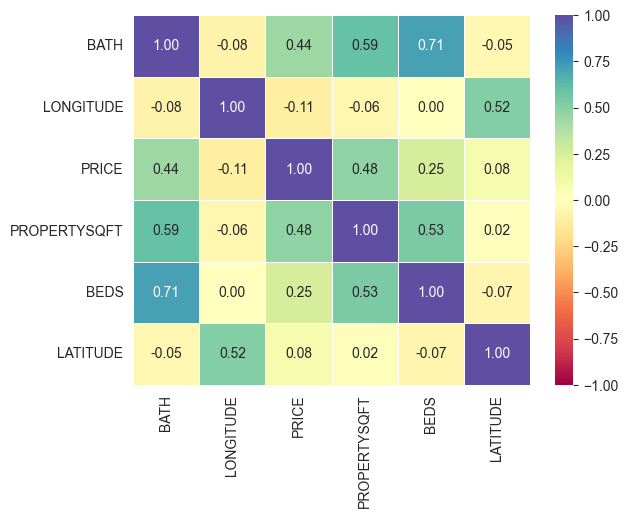

In [1178]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

In [1179]:
data.to_excel('ssdata.xlsx')

In [1180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns.remove('PRICE')
print(len(numeric_columns))

mm_scalers = {}
for column in numeric_columns:
    mm_scalers[column] = MinMaxScaler()
    data[column] = mm_scalers[column].fit_transform(data[column].values.reshape(-1, 1))

5


In [1181]:
len(category_columns)

8

In [1182]:
len(data.columns)

14

In [1183]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in category_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [1184]:
for column in category_columns:
    for class_index, class_name in enumerate(label_encoders[column].classes_):
        print(f"{class_name}: {class_index}")

1: 0
1-26: 1
10: 2
10-18: 3
10-40: 4
10-41: 5
10-45: 6
100: 7
100-03: 8
100-05: 9
100-25: 10
1000: 11
1009: 12
101: 13
101-11: 14
101-55: 15
1010: 16
10102: 17
10114: 18
1016: 19
1017: 20
1019: 21
102: 22
102-04: 23
102-10: 24
102-15: 25
102-17: 26
102-26: 27
102-30: 28
102-33: 29
102-37: 30
102-40: 31
102-42: 32
102-57: 33
1020: 34
10229: 35
1023: 36
10236: 37
1024: 38
1025: 39
1027: 40
103-12: 41
10306: 42
1032: 43
1035: 44
1038: 45
104: 46
104-02: 47
104-06: 48
104-14: 49
104-30: 50
104-33: 51
104-37: 52
104-40: 53
1040: 54
10421: 55
1045: 56
1046: 57
1049: 58
105: 59
105-26: 60
105-47: 61
1050: 62
1051: 63
10557: 64
1056: 65
106: 66
106-09: 67
106-10: 68
1060: 69
1065: 70
1068: 71
1069: 72
107: 73
1070: 74
10716: 75
10724: 76
10740: 77
1075: 78
1077: 79
108: 80
108-16: 81
108-36: 82
108-49: 83
108-50: 84
1085: 85
1086: 86
1088: 87
109: 88
109-06: 89
109-20: 90
109-42: 91
109-9: 92
1091: 93
11: 94
11-18: 95
110: 96
110-02: 97
110-11: 98
110-19: 99
110-25: 100
110-35: 101
110-36: 102

<Axes: >

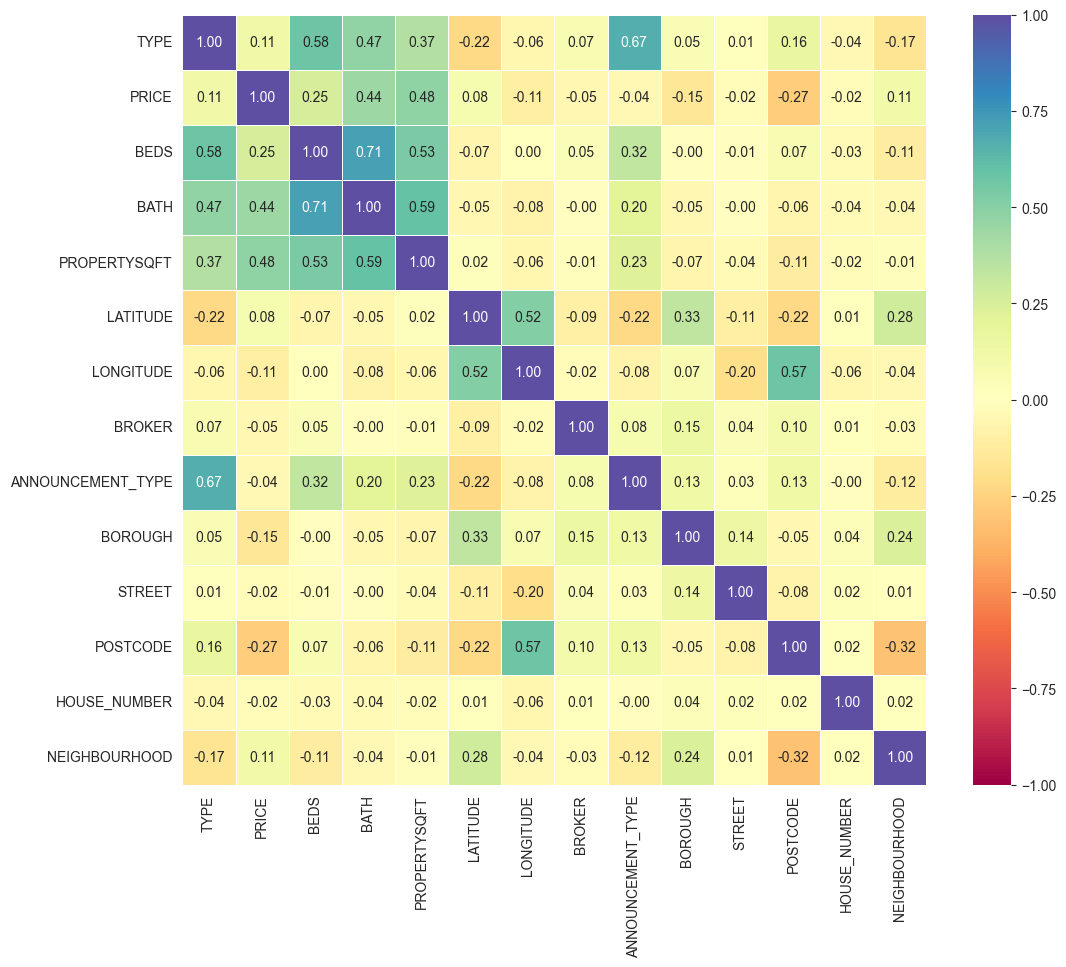

In [1185]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

Utworzenie macierzy korelacji dla wszystkich kolumn. 

Stworzenie data_relevant, zawierającej kolumny z dataframe data, których bezwzględna wartość korelacji z cenami nieruchomości wynosi co najmniej 0.03.

In [1186]:
corr_matrix = data.corr()
pairs = []
for i in range(len(corr_matrix.columns)):
  for j in range(i+1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i, j]) > 0.8:
      pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in pairs:
  print(pair)


In [1187]:
corr_matrix = data.corr()
corr_df = pd.DataFrame(abs(corr_matrix['PRICE'].drop('PRICE')).sort_values(ascending=True))
relevant_columns = corr_df[abs(corr_df['PRICE'])>=0.05].index
relevant_columns = list(relevant_columns)
relevant_columns.append('PRICE')
data_relevant = data[relevant_columns]

<Axes: >

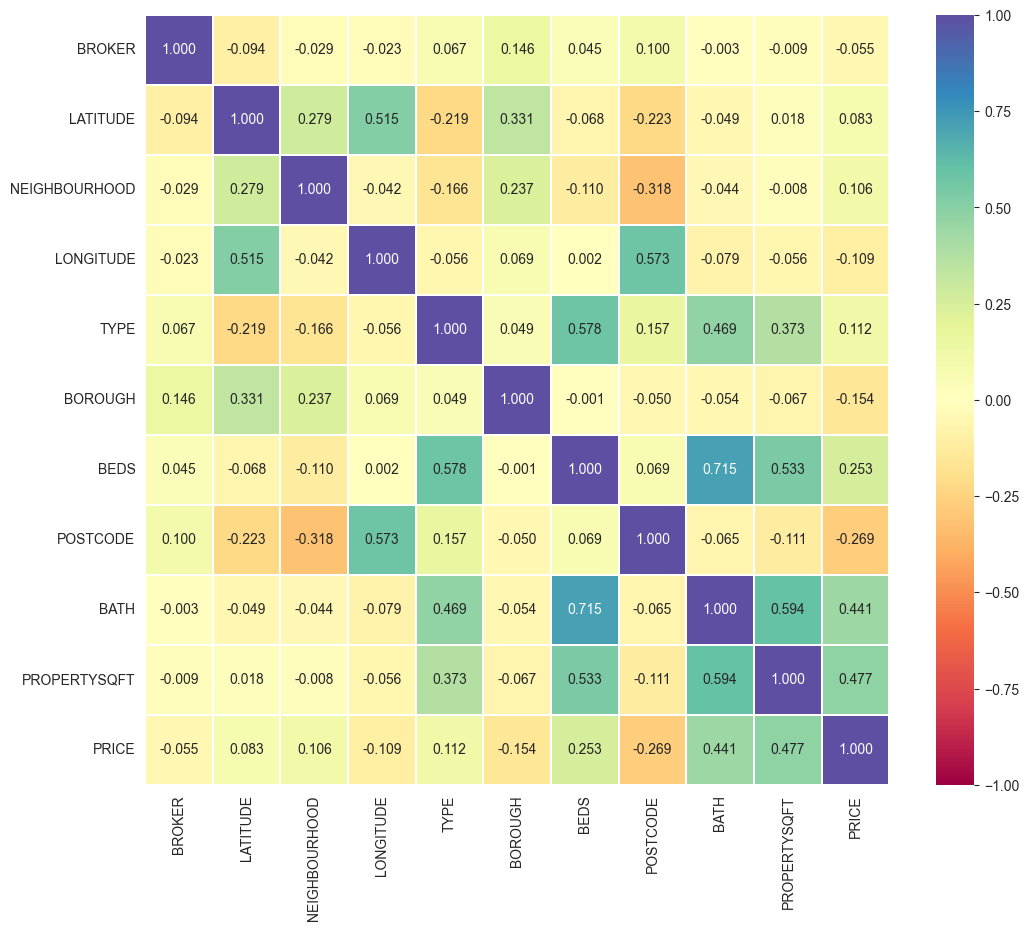

In [1188]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_relevant.corr(), annot=True, cmap='Spectral', linewidths=0.3,fmt=".3f", vmax=1, vmin=-1)

In [1189]:
data.to_excel('clean_data.xlsx')
data_relevant.to_excel('clean_data_relevant.xlsx')

Analiza głównych składowych PCA na danych: określenie liczby składowych głównych, stworzenie listy składowych głównych i nazw kolumn dla wynikowych składowych głównych, stworzenie instancji klasy PCA. Stworzenie ramki danych zawierającą przekształcone wartości zmiennych za pomocą PCA.

In [1190]:
from sklearn.decomposition import PCA
X = data_relevant.drop(columns =['PRICE'])
y = data_relevant['PRICE']

n_comp = 3
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)
print(pca.explained_variance_ratio_)
data_relevant_pca

[0.85863484 0.11540242 0.02577442]


,feature_0,feature_1,feature_2
0,-161.656694,140.267465,-34.290383
1,405.962600,137.056691,-9.492036
2,-221.640566,139.297437,-33.295344
3,410.605489,-132.396675,7.903313
4,-161.558855,139.230633,-29.400229
...,...,...,...
4501,-221.199618,133.770616,-12.001057
4502,155.623357,52.097865,72.532071
4503,-161.834773,142.147460,-43.107269
4504,-146.013918,-55.307258,54.786194


In [1191]:
data_relevant_pca.to_excel('clean_data_relevant_pca.xlsx')